## Tweet Extraction and Cleaning

In [83]:
import tweepy
import pandas as pd
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob as tb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stopwords = stopwords.words('english')

In [69]:
# Previously generated keys

row1_consumer_key = 'RHPfTrTJOAk6ufmtVe77fMilq'
row1_consumer_key_secret = 'SCCBQIsnltmbJ33iW3k6J3dLzCv1DRUadfeeP9E1Ljw3iEIrSw'
access_token = ''
access_token_secret = ''

In [32]:
def create_api(consumer_key, consumer_key_secret):
    """
    Creates an API instance with the provided access tokens
    """
    auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api

In [73]:
def search_tweets(api, query, ignore_rt=False, max_tweets=1000, lang='en'):
    """
    Searches public tweets given the API, query, and other optional parameters
    """
    if ignore_rt:
        query = query + ' -filter:retweets'
    search = tweepy.Cursor(api.search, query, lang=lang).items(max_tweets)
    print("Downloaded {0} tweets".format(max_tweets))
    return search

In [74]:
def search_to_df(search_results):
    """
    Transform search results into a Pandas dataframe
    """
    tweets = [[t.id, t.user.screen_name, t.created_at, t.text] for t in search_results]
    tweets_df = pd.DataFrame(tweets, columns=['id', 'handle', 'created_at', 'text'])
    return tweets_df

In [78]:
def clean_tweets(tweets):
    """
    Replaces empty tweets, replaces text with lower case characters,
    remove special characters and RTs, remove leading and trailing
    whitespaces, and remove stopwords.
    """
    tweets['cleaned_text'] = tweets['text'].fillna('')
    tweets['cleaned_text'] = tweets['cleaned_text'].str.lower()
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|rt|\d+', '')
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'^\s+|\s+$', '') 
    tweets['cleaned_text'] = tweets['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stopwords)]))
    return tweets

#### A Whole New World

In [75]:
api = create_api(row1_consumer_key, row1_consumer_key_secret)
search_results_1 = search_tweets(api, 'aladdin whole new world', ignore_rt=True, max_tweets=300)
aladdin_wnw = search_to_df(search_results_1)

Downloaded 300 tweets


In [76]:
aladdin_wnw.to_csv('out/aladdin_wnw.csv', index=False)

In [79]:
aladdin_cleaned_wnw = clean_tweets(aladdin_wnw)
aladdin_cleaned_wnw.head()

,id,handle,created_at,text,cleaned_text
0,1141907764735696896,jakoleroverthnk,2019-06-21 03:16:41,almost too funny to be true: after making out ...,almost funny true making bigla syang nanood ng...
1,1141904807722139653,CharlieC0317,2019-06-21 03:04:56,Aladdin - A Whole New World (Mother/Son Duet) ...,aladdin whole new world motherson duet via sin...
2,1141897844997152768,juamarinelli,2019-06-21 02:37:16,@iwannacoffeenow a whole new world-aladdin\nyo...,whole new worldaladdinyouve got friend toy story
3,1141893052774174722,galaxykino,2019-06-21 02:18:13,also @jacksonslight says its a whole new world...,also says whole new world aladdin jasmine also...
4,1141892426296152066,jacksonslight,2019-06-21 02:15:44,a whole new world by Aladdin and Jasmine https...,whole new world aladdin jasmine


In [80]:
aladdin_cleaned_wnw.to_csv('out/aladdin_cleaned_wnw.csv', index=False)

#### Arabian Nights

In [81]:
search_results_2 = search_tweets(api, 'aladdin arabian nights', ignore_rt=True, max_tweets=300)
aladdin_an = search_to_df(search_results_2)

Downloaded 300 tweets


In [84]:
aladdin_an.to_csv('out/aladdin_an.csv', index=False)

In [85]:
aladdin_cleaned_an = clean_tweets(aladdin_an)
aladdin_cleaned_an.to_csv('out/aladdin_cleaned_an.csv', index=False)

#### A Friend Like Me

In [86]:
search_results_3 = search_tweets(api, 'aladdin friend like me', ignore_rt=True, max_tweets=300)
aladdin_flm = search_to_df(search_results_3)
aladdin_cleaned_flm = clean_tweets(aladdin_flm)
aladdin_cleaned_flm.to_csv('out/aladdin_cleaned_flm.csv', index=False)

Downloaded 300 tweets


#### Speechless

In [88]:
search_results_4 = search_tweets(api, 'aladdin speechless', ignore_rt=True, max_tweets=300)
aladdin_s = search_to_df(search_results_4)
aladdin_cleaned_s = clean_tweets(aladdin_s)
aladdin_cleaned_s.to_csv('out/aladdin_cleaned_s.csv', index=False)

Downloaded 300 tweets


## Text Analysis

In [93]:
import seaborn as sns

In [89]:
def analyze_tweets(tweets):
    """Analyzes the sentiment polarity and subjectivity of tweets"""
    sentiment = []
    subjectivity = []
    for text in tweets['text']:
        blob = tb(text)
        sentiment.append(blob.polarity)
        subjectivity.append(blob.subjectivity)
    tweets['sentiment'] = sentiment
    tweets['subjectivity'] = subjectivity
    return tweets

In [100]:
# Whole New World

wnw = analyze_tweets(aladdin_cleaned_wnw)
wnw.head()

,id,handle,created_at,text,cleaned_text,sentiment,subjectivity
0,1141907764735696896,jakoleroverthnk,2019-06-21 03:16:41,almost too funny to be true: after making out ...,almost funny true making bigla syang nanood ng...,0.200000,0.550000
1,1141904807722139653,CharlieC0317,2019-06-21 03:04:56,Aladdin - A Whole New World (Mother/Son Duet) ...,aladdin whole new world motherson duet via sin...,0.445455,0.584848
2,1141897844997152768,juamarinelli,2019-06-21 02:37:16,@iwannacoffeenow a whole new world-aladdin\nyo...,whole new worldaladdinyouve got friend toy story,0.168182,0.427273
3,1141893052774174722,galaxykino,2019-06-21 02:18:13,also @jacksonslight says its a whole new world...,also says whole new world aladdin jasmine also...,0.168182,0.427273
4,1141892426296152066,jacksonslight,2019-06-21 02:15:44,a whole new world by Aladdin and Jasmine https...,whole new world aladdin jasmine,0.168182,0.427273


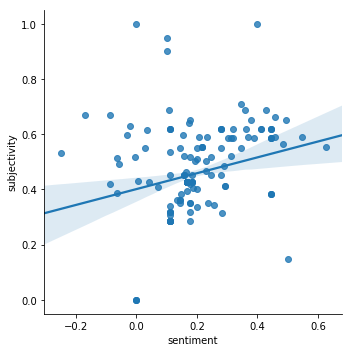

In [101]:
sns.lmplot(data=wnw, x='sentiment', y='subjectivity', fit_reg=True) 

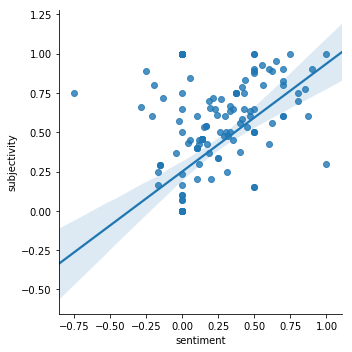

In [102]:
# Friend Like Me
flm = analyze_tweets(aladdin_cleaned_flm)
sns.lmplot(data=flm, x='sentiment', y='subjectivity', fit_reg=True) 

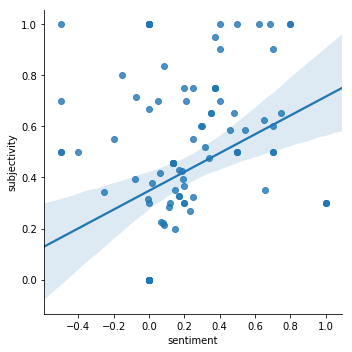

In [103]:
# Arabian Nights
an = analyze_tweets(aladdin_cleaned_an)
sns.lmplot(data=an, x='sentiment', y='subjectivity', fit_reg=True) 

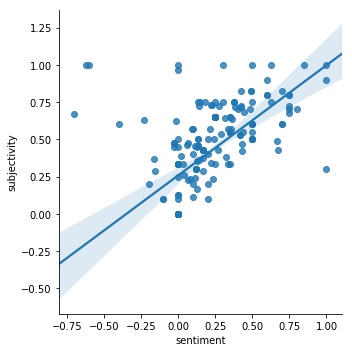

In [104]:
# Speechless
s = analyze_tweets(aladdin_cleaned_s)
sns.lmplot(data=s, x='sentiment', y='subjectivity', fit_reg=True) 

Heatmap

In [136]:
heatmap = pd.DataFrame()
heatmap['wnw_sent'] = aladdin_cleaned_wnw['sentiment']
heatmap['flm_sent'] = aladdin_cleaned_flm['sentiment']
heatmap['an_sent'] = aladdin_cleaned_an['sentiment']
heatmap['s_sent'] = aladdin_cleaned_s['sentiment']

In [137]:
heatmap['wnw_subj'] = aladdin_cleaned_wnw['subjectivity']
heatmap['flm_subj'] = aladdin_cleaned_flm['subjectivity']
heatmap['an_subj'] = aladdin_cleaned_an['subjectivity']
heatmap['s_subj'] = aladdin_cleaned_s['subjectivity']

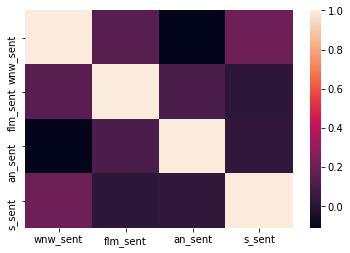

In [138]:
heatmap_new = heatmap.dropna()
sns.heatmap(heatmap_new[['wnw_sent', 'flm_sent', 'an_sent', 's_sent']].corr())

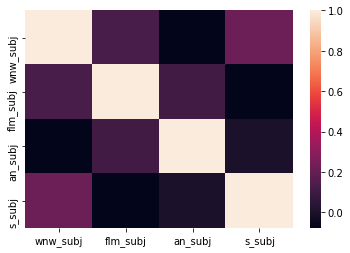

In [139]:
sns.heatmap(heatmap_new[['wnw_subj', 'flm_subj', 'an_subj', 's_subj']].corr())

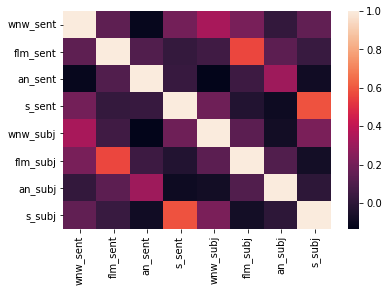

In [140]:
sns.heatmap(heatmap_new[['wnw_sent', 'flm_sent', 'an_sent', 's_sent','wnw_subj', 'flm_subj', 'an_subj', 's_subj']].corr())

In [141]:
heatmap.describe()

,wnw_sent,flm_sent,an_sent,s_sent,wnw_subj,flm_subj,an_subj,s_subj
count,300.000000,202.000000,124.000000,300.000000,300.000000,202.000000,124.000000,300.000000
mean,0.184296,0.156644,0.163583,0.193896,0.454230,0.358432,0.407527,0.401085
std,0.103412,0.265988,0.295231,0.237275,0.111244,0.353196,0.347442,0.295788
min,-0.250000,-0.750000,-0.500000,-0.700000,0.000000,0.000000,0.000000,0.000000
25%,0.168182,0.000000,0.000000,0.000000,0.427273,0.000000,0.000000,0.000000
50%,0.168182,0.000000,0.056250,0.168182,0.427273,0.350000,0.394192,0.493750
75%,0.168182,0.316761,0.324375,0.350000,0.451061,0.650000,0.655303,0.650000
max,0.625000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
heatmap_fill = heatmap
heatmap_fill['an_sent'].fillna(heatmap['an_sent'].mean(),inplace=True)
heatmap_fill['an_subj'].fillna(heatmap['an_subj'].mean(),inplace=True)
heatmap_fill['flm_sent'].fillna(heatmap['flm_sent'].mean(),inplace=True)
heatmap_fill['flm_subj'].fillna(heatmap['flm_subj'].mean(),inplace=True)

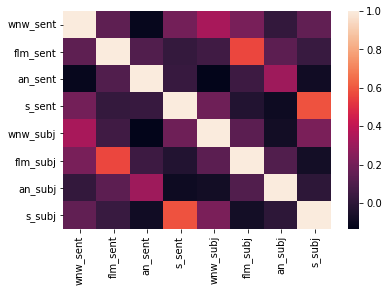

In [151]:
sns.heatmap(heatmap_new[['wnw_sent', 'flm_sent', 'an_sent', 's_sent','wnw_subj', 'flm_subj', 'an_subj', 's_subj']].corr())

In [153]:
# Aladdin general
search_results_5 = search_tweets(api, 'aladdin', ignore_rt=True, max_tweets=300)
aladdin = search_to_df(search_results_5)
aladdin_cleaned = clean_tweets(aladdin)
aladdin_cleaned.to_csv('out/aladdin_cleaned.csv', index=False)

Downloaded 300 tweets


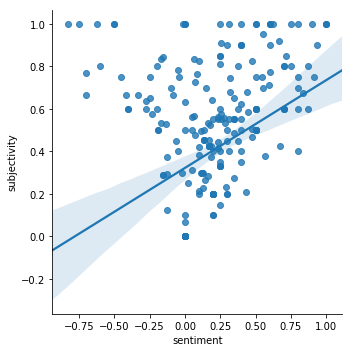

In [164]:
ald = analyze_tweets(aladdin_cleaned)
heatmap_fill['sent'] = ald['sentiment']
heatmap_fill['subj'] = ald['subjectivity']
sns.lmplot(data=ald, x='sentiment', y='subjectivity', fit_reg=True) 

In [165]:
heatmap_fill.describe()

,wnw_sent,flm_sent,an_sent,s_sent,wnw_subj,flm_subj,an_subj,s_subj,sent,subj
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.184296,0.156644,0.163583,0.193896,0.454230,0.358432,0.407527,0.401085,0.154681,0.385958
std,0.103412,0.218084,0.189356,0.237275,0.111244,0.289586,0.222843,0.295788,0.306347,0.342903
min,-0.250000,-0.750000,-0.500000,-0.700000,0.000000,0.000000,0.000000,0.000000,-0.825000,0.000000
25%,0.168182,0.000000,0.150000,0.000000,0.427273,0.000000,0.407527,0.000000,0.000000,0.000000
50%,0.168182,0.156644,0.163583,0.168182,0.427273,0.358432,0.407527,0.493750,0.049773,0.400000
75%,0.168182,0.156644,0.163583,0.350000,0.451061,0.500000,0.407527,0.650000,0.312216,0.645313
max,0.625000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


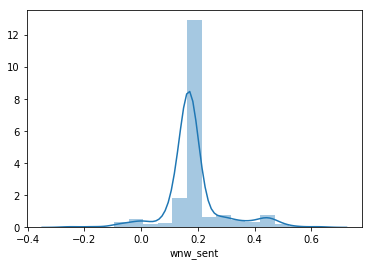

In [166]:
sns.distplot(heatmap.wnw_sent)

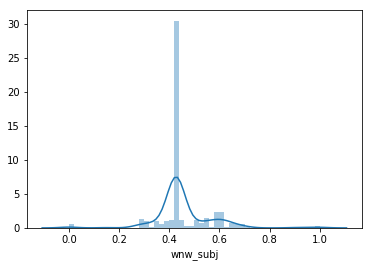

In [167]:
sns.distplot(heatmap.wnw_subj)

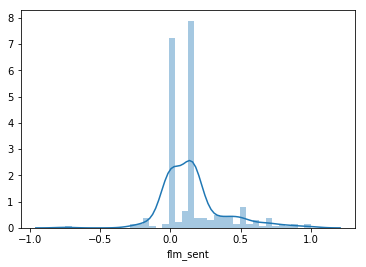

In [168]:
sns.distplot(heatmap.flm_sent)

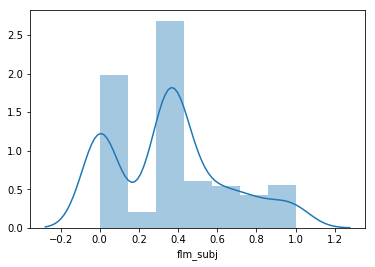

In [169]:
sns.distplot(heatmap.flm_subj)

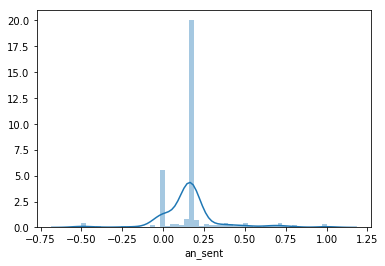

In [170]:
sns.distplot(heatmap.an_sent)

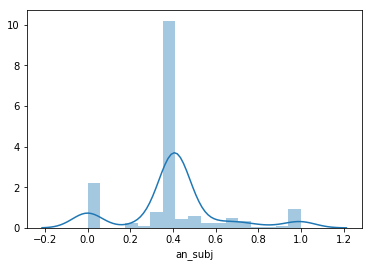

In [171]:
sns.distplot(heatmap.an_subj)

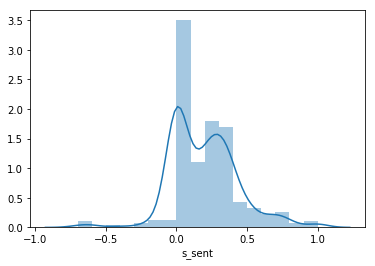

In [172]:
sns.distplot(heatmap.s_sent)

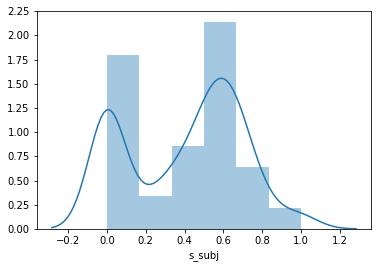

In [173]:
sns.distplot(heatmap.s_subj)